Importing the library 

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr

Fetching the data from the dataset

In [2]:
dataset=pd.read_csv("/content/apple_stock.csv")
dataset=dataset.dropna()
dataset=dataset[['Open','High','Low','Close','Adj Close']]
dataset.head()   #Print the first 5 rows of the dataset

,Open,High,Low,Close,Adj Close
0,21.365000,21.535713,18.062500,20.902857,17.924156
1,21.201786,21.235357,17.901072,19.006071,16.372108
2,19.779285,19.821428,15.535714,16.267500,14.013056
3,16.396786,17.319286,15.630714,15.764286,13.579582
4,15.642857,16.783930,14.964286,15.809286,13.697714


In [3]:
dataset['Open-Close']=dataset.Open-dataset.Close
dataset['High-Low']=dataset.High-dataset.Low
dataset=dataset.dropna()
X=dataset[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
0,0.462143,3.473213
1,2.195715,3.334285
2,3.511785,4.285714
3,0.632500,1.688572
4,-0.166429,1.819644


In [4]:
Y=np.where(dataset['Close'].shift(-1)>dataset['Close'],1,-1)

Splitting the dataset into training and testing

In [5]:
split_percentage=0.7
split=int(split_percentage*len(dataset))
X_train=X[:split]
Y_train=Y[:split]
X_test=X[split:]
Y_test=Y[split:]

Now we are instantiating the knn model

In [6]:
knn=KNeighborsClassifier(n_neighbors=50)

#Now we will fit the model
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=50)

Accuracy Score

In [7]:
accuracy_train=accuracy_score(Y_train,knn.predict(X_train))
accuracy_test=accuracy_score(Y_test,knn.predict(X_test))

 #Print the training and training scores
print('Train_data_accuracy : %.2f' %accuracy_train)
print('Testing_data_accuracy : %.2f'  %accuracy_test)

Train_data_accuracy : 0.60
Testing_data_accuracy : 0.64


Creating the training stategies using knn model

In [8]:
#predicted signal
dataset['Predicted_signal']=knn.predict(X)

#SRY Cumulative returns
dataset['SPY_returns'] = np.log(dataset['Close']/dataset['Close'].shift(1))
Cumulative_SPY_returns = dataset[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
dataset['Startegy_returns'] = dataset['SPY_returns']* dataset['Predicted_signal'].shift(1)
Cumulative_Strategy_returns = dataset[split:]['Startegy_returns'].cumsum()*100

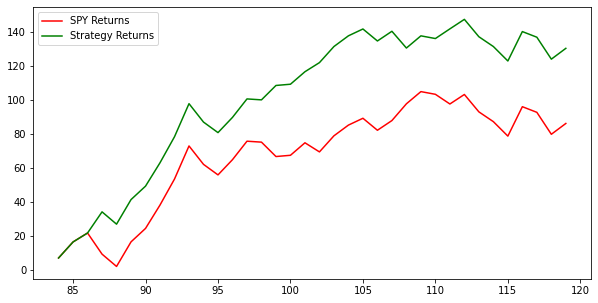

In [9]:
#plot the results to visualize the performance
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [10]:
#Now we will calculate the sharpe ratio

#Calculating the standard deviation
Stde=Cumulative_Strategy_returns.std()




In [11]:
Sharpe=(Cumulative_Strategy_returns-Cumulative_SPY_returns)/Stde
Sharpe=Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe)

Sharpe ratio: 0.81


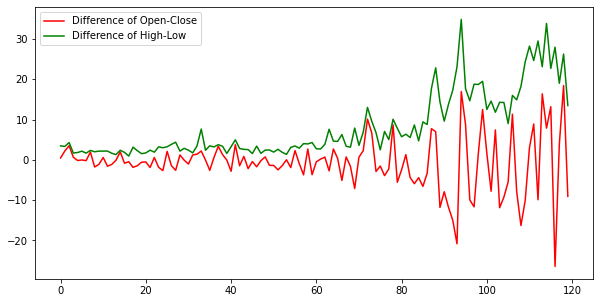

In [12]:
Diff_O_C=dataset['Open-Close']
Diff_H_L=dataset['High-Low']
plt.figure(figsize=(10,5))
plt.plot(Diff_O_C, color='r',label = 'Difference of Open-Close')
plt.plot(Diff_H_L, color='g', label = 'Difference of High-Low')
plt.legend()
plt.show()

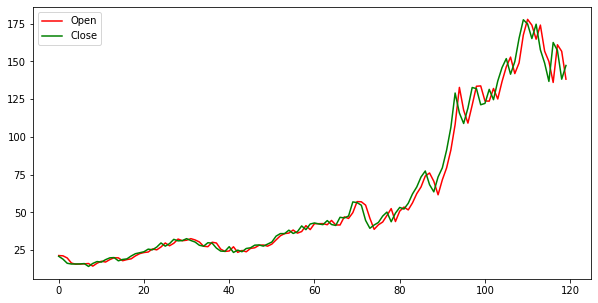

In [13]:
from matplotlib.backend_bases import CloseEvent
Op=dataset['Open']
Cls=dataset['Close']
plt.figure(figsize=(10,5))
plt.plot(Op, color='r',label = 'Open')
plt.plot(Cls, color='g', label = 'Close')
plt.legend()
plt.show()

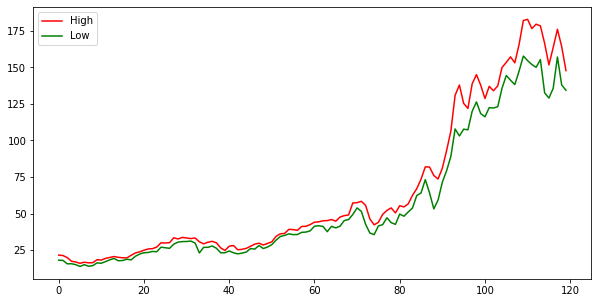

In [14]:
Hi=dataset['High']
Lo=dataset['Low']
plt.figure(figsize=(10,5))
plt.plot(Hi, color='r',label = 'High')
plt.plot(Lo, color='g', label = 'Low')
plt.legend()
plt.show()